In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [4]:
df = yf.download('AAPL',
                       start='2012-01-01',
                       end='2023-06-01',
                       progress=False)

In [6]:
# Isolate the adjusted closing prices into a series
adj_close_px = df['Adj Close']

In [8]:
# Calculate the moving average - # 40 days
moving_avg = adj_close_px.rolling(window=40).mean()

In [9]:
moving_avg

Date
2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
                 ...    
2023-05-24    167.787518
2023-05-25    168.098569
2023-05-26    168.430926
2023-05-30    168.746620
2023-05-31    169.029358
Name: Adj Close, Length: 2871, dtype: float64

In [10]:
# Short moving window rolling mean
df['sma_40'] = adj_close_px.rolling(window=40).mean()

In [11]:
# Long moving window rolling mean - 252 days
df['sma_252'] = adj_close_px.rolling(window=252).mean()

<Axes: xlabel='Date'>

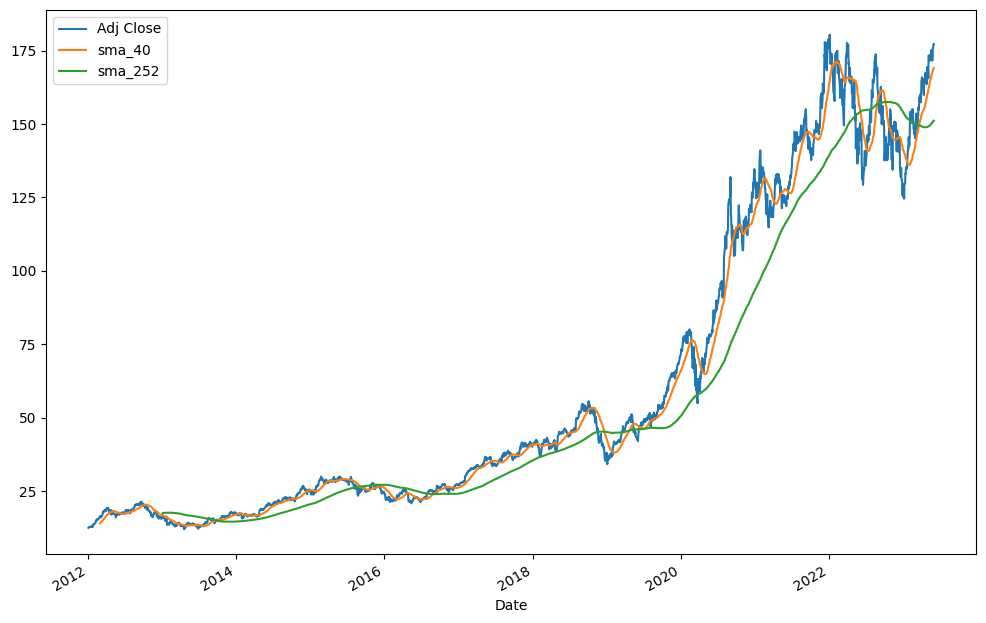

In [14]:
# Plot the adjusted closing price, the short and long windows of rolling means
fig, ax = plt.subplots( nrows=1, ncols=1 )
df[['Adj Close', 'sma_40', 'sma_252']].plot(figsize=(12,8),ax=ax)

In [15]:
# Cumulative moving average
df['cma'] = adj_close_px.expanding().mean()

<Axes: xlabel='Date'>

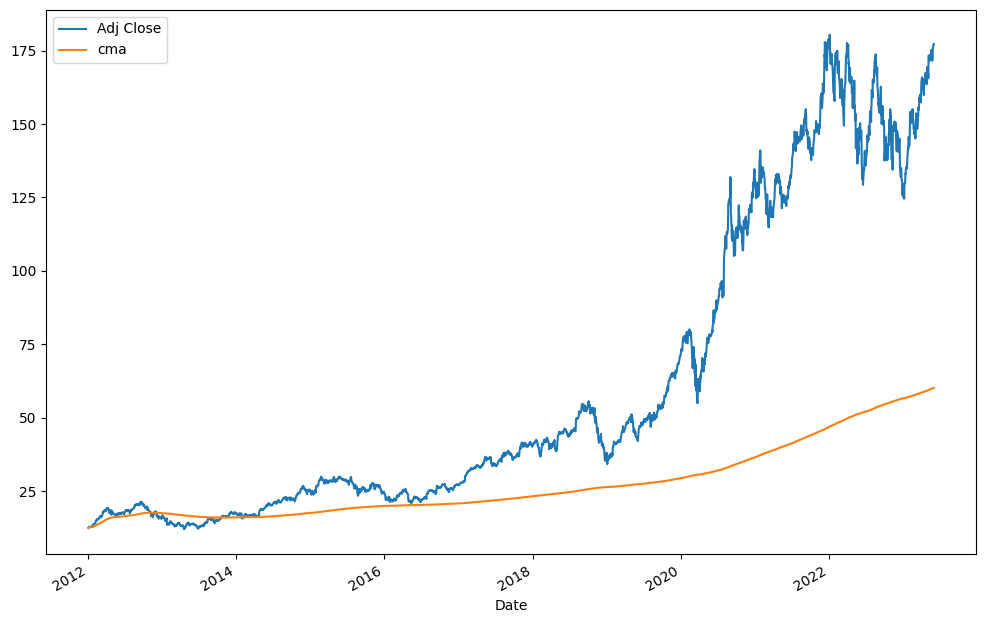

In [16]:
# Plot the adjusted closing price, the short and long windows of rolling means
fig, ax = plt.subplots( nrows=1, ncols=1 )
df[['Adj Close', 'cma']].plot(figsize=(12,8),ax=ax)

In [17]:
# Short moving window rolling mean
df['ewma_alpha_0.1'] = adj_close_px.ewm(alpha=0.1, adjust=False).mean()

In [18]:
# Long moving window rolling mean - 252 days
df['ewma_alpha_0.5'] = adj_close_px.ewm(alpha=0.5, adjust=False).mean()

<Axes: xlabel='Date'>

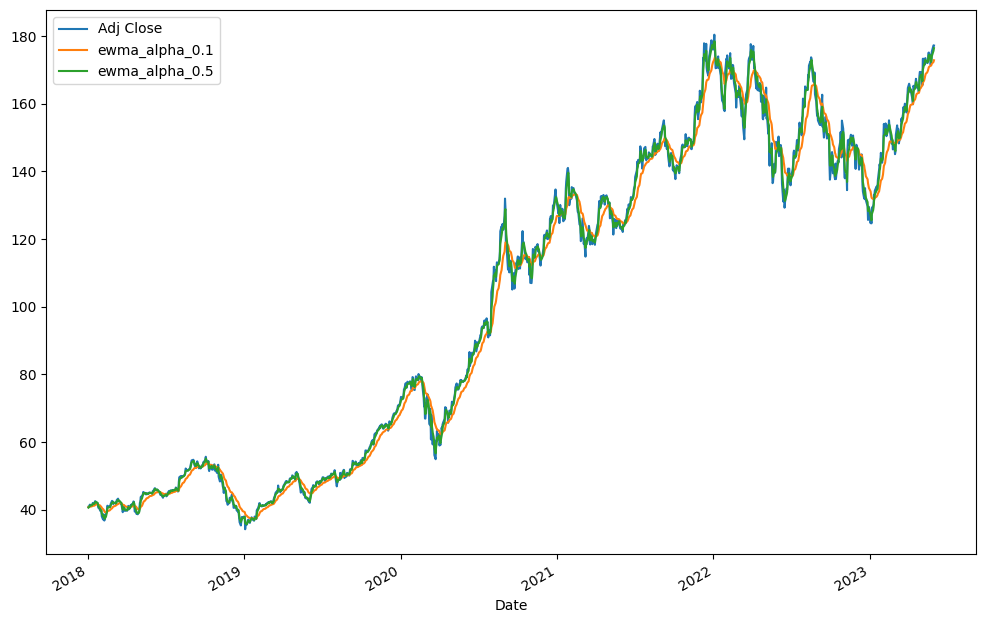

In [20]:
# Plot the adjusted closing price, the short and long windows of rolling means
# Plotting from January 2018 for clearer visualization
fig, ax = plt.subplots( nrows=1, ncols=1 )
df.loc['2018-01-01':,['Adj Close', 'ewma_alpha_0.1', 'ewma_alpha_0.5']].plot(figsize=(12,8),ax=ax)

In [22]:
#Define the minimum of periods to consider 
min_periods = 75

In [23]:
# Calculate the volatility 
vol = adj_close_px.rolling(min_periods).std() * np.sqrt(min_periods)

<Axes: xlabel='Date'>

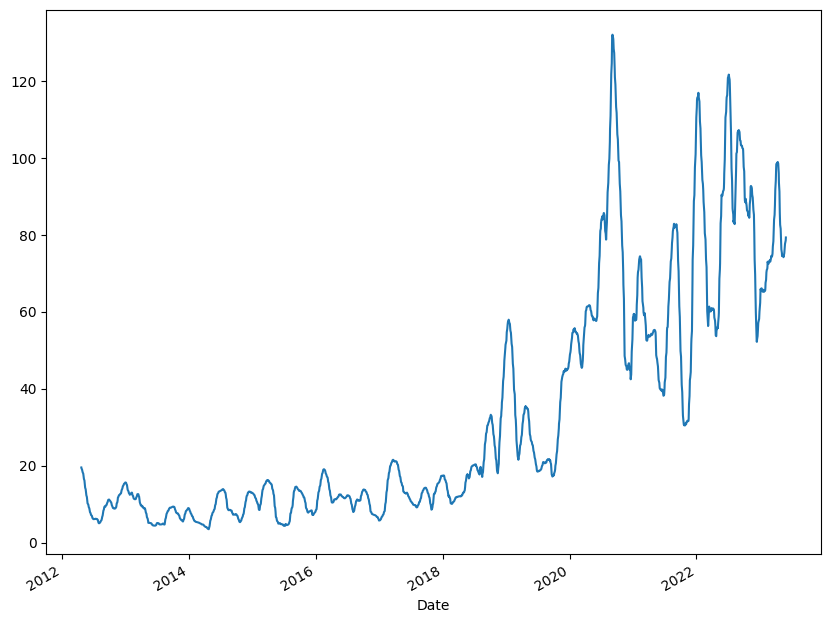

In [25]:
# Plot the volatility
fig, ax = plt.subplots( nrows=1, ncols=1 )
vol.plot(figsize=(10, 8),ax=ax)

